# Quick Start (Square Bin)

In this case, we use spatial expression matrix of bin1(bin_size is defined beblow) in the mouse brain generated by Stereo-seq for downstream analysis.

<div class="alert alert-info">

**Note**

Download the notebook of [Quick Start](https://github.com/STOmics/stereopy/blob/main/docs/source/Tutorials/clustering.ipynb). You can download all notebooks of Stereopy-tutorial on [Github](https://github.com/STOmics/stereopy).

</div>

## Introduction of raw data

#### GEM and GEF

There are two types of Stereo-seq data, GEM and GEF. The format of original expression matrix of GEM file is as follows: x, y are the spatial position of the gene in tissue section, and MIDCount is the number of gene expression. ExonCount is the number of exons expression only in GEM file, which is generated by `spatial_RNA_visualization_v5` in SAP or SAW (version >= 5.1.3).

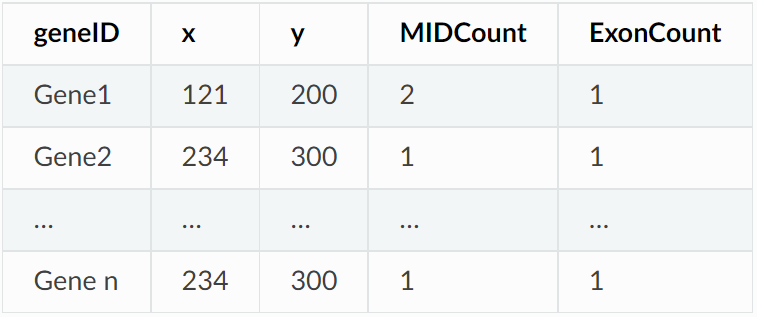

More information of GEF file is in the [format documentation](https://www.processon.com/view/link/610cc49c7d9c087bbd1ab7ab#map). Usually, we recommend using GEF format of which reading speed is much faster than GEM.

#### Bin size

The resolution of Stereo-seq technology is up to nanometer level, where nanopore radius of bin1 is 250 nm.

Generally, `bin_size` parameter is set to combine the nanopores within a certain range into a `bin unit`. For instance, the side length of the bin unit is approximately 10 or 14 microns when `bin_size` is set to 20, according to different center-to-center distances, like 500 nm or 715 nm.

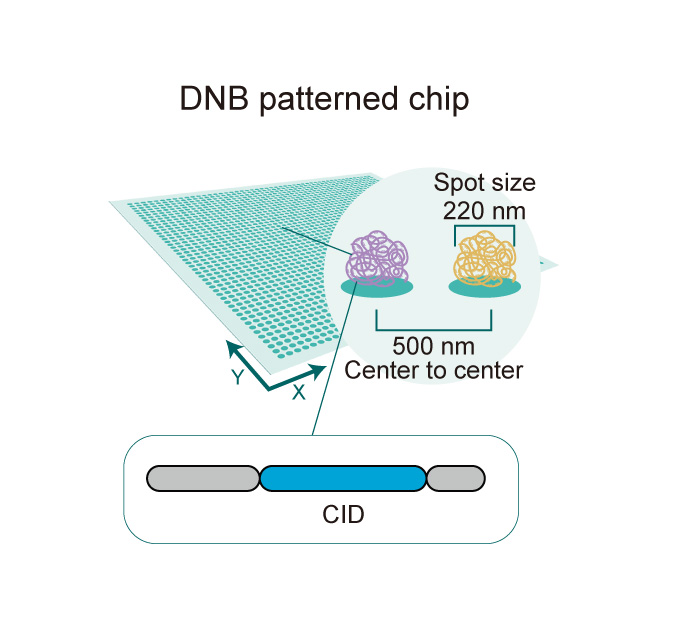

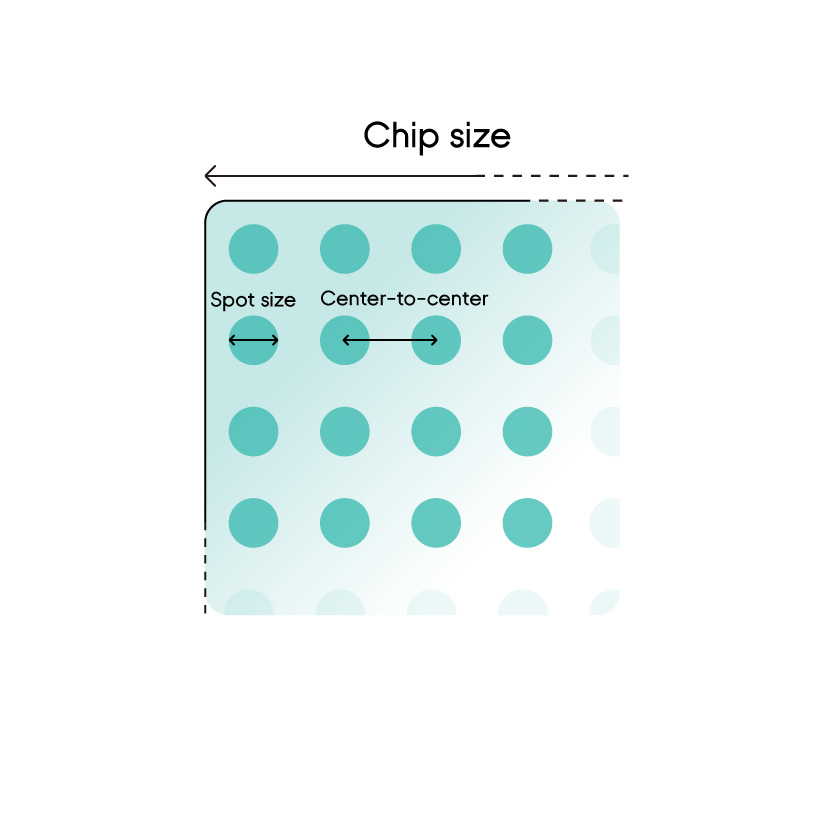

After the combination according to a certain **bin_size**, we will uniformly generate data into the format of StereoExpData.

#### Performance

At the end of this part, we display the running [performance](https://stereopy.readthedocs.io/en/latest/Tutorials/Performance.html) of different bin_sizes to those who are handling mass data and more concerned about computational performance. Welcome to come back here after having finished this example. Also, similar performing tests come up elsewhere in Stereopy. 

## Reading data

Firstly, download our [example data](http://116.6.21.110:8090/share/3ca60300-e8bd-4d67-8b68-14267e428523) and import Stereopy.

In [1]:
import stereo as st
import warnings
warnings.filterwarnings('ignore')

Get the version information of Stereopy.

In [2]:
st.__version__

'1.1.0'

Get attributes of the GEF file.

In [3]:
data_path = '../data/SS200000135TL_D1.tissue.gef'
st.io.read_gef_info(data_path)

[2024-01-17 10:19:46][Stereo][3643][MainThread][140100178437952][reader][1317][INFO]: This is GEF file which contains traditional bin infomation.
[2024-01-17 10:19:46][Stereo][3643][MainThread][140100178437952][reader][1318][INFO]: bin_type: bins
[2024-01-17 10:19:46][Stereo][3643][MainThread][140100178437952][reader][1321][INFO]: Bin size list: ['bin1']
[2024-01-17 10:19:46][Stereo][3643][MainThread][140100178437952][reader][1327][INFO]: Resolution: 500
[2024-01-17 10:19:46][Stereo][3643][MainThread][140100178437952][reader][1330][INFO]: Gene count: 24302
[2024-01-17 10:19:46][Stereo][3643][MainThread][140100178437952][reader][1339][INFO]: offsetX: 0
[2024-01-17 10:19:46][Stereo][3643][MainThread][140100178437952][reader][1342][INFO]: offsetY: 0
[2024-01-17 10:19:46][Stereo][3643][MainThread][140100178437952][reader][1345][INFO]: Width: 26458
[2024-01-17 10:19:46][Stereo][3643][MainThread][140100178437952][reader][1348][INFO]: Height: 26458
[2024-01-17 10:19:46][Stereo][3643][MainThre

{'bin_list': ['bin1'],
 'resolution': 500,
 'gene_count': 24302,
 'offsetX': 0,
 'offsetY': 0,
 'width': 26458,
 'height': 26458,
 'maxExp': 23}

Load data to generate a StereoExpData object.

In [4]:
data = st.io.read_gef(file_path=data_path, bin_size=50)

# simply type the varibale to get related information
data

[2024-01-17 10:19:46][Stereo][3643][MainThread][140100178437952][reader][1070][INFO]: read_gef begin ...


path:../data/SS200000135TL_D1.tissue.gef bin:50
               generateBinInfo - 22.520000 cpu sec


[2024-01-17 10:20:01][Stereo][3643][MainThread][140100178437952][reader][1241][INFO]: the matrix has 35998 cells, and 24302 genes.
[2024-01-17 10:20:01][Stereo][3643][MainThread][140100178437952][reader][1242][INFO]: read_gef end.


StereoExpData object with n_cells X n_genes = 35998 X 24302
bin_type: bins
bin_size: 50
offset_x = 0
offset_y = 0
cells: ['cell_name']
genes: ['gene_name']
result: []

##  Preprocessing

Data preprocessing includes three modules: quality control, filtering and normalization.

#### Quality Control

This module calculates the quality distribution of original data, using three indicators:

    total_counts - the total counts per cell;

    n_genes_by_counts - the number of genes expressed in count maxtrix;

    pct_countss_mt - the percentage of counts in mitochondrial genes.

In [5]:
data.tl.cal_qc()

[2024-01-17 10:20:01][Stereo][3643][MainThread][140100178437952][st_pipeline][41][INFO]: start to run cal_qc...
[2024-01-17 10:20:01][Stereo][3643][MainThread][140100178437952][st_pipeline][44][INFO]: cal_qc end, consume time 0.4553s.


Show the violin figure of QC distribution.

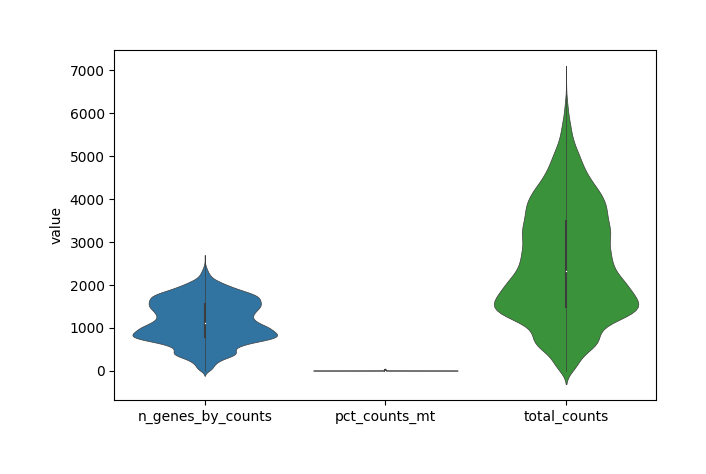

In [6]:
data.plt.violin()

<div class="alert alert-info">

**Note**

Just input your file name and click the download button to save visualization result, or set parameter in plot functions.

</div>

Show the spatial scatter figure of QC distribution.

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

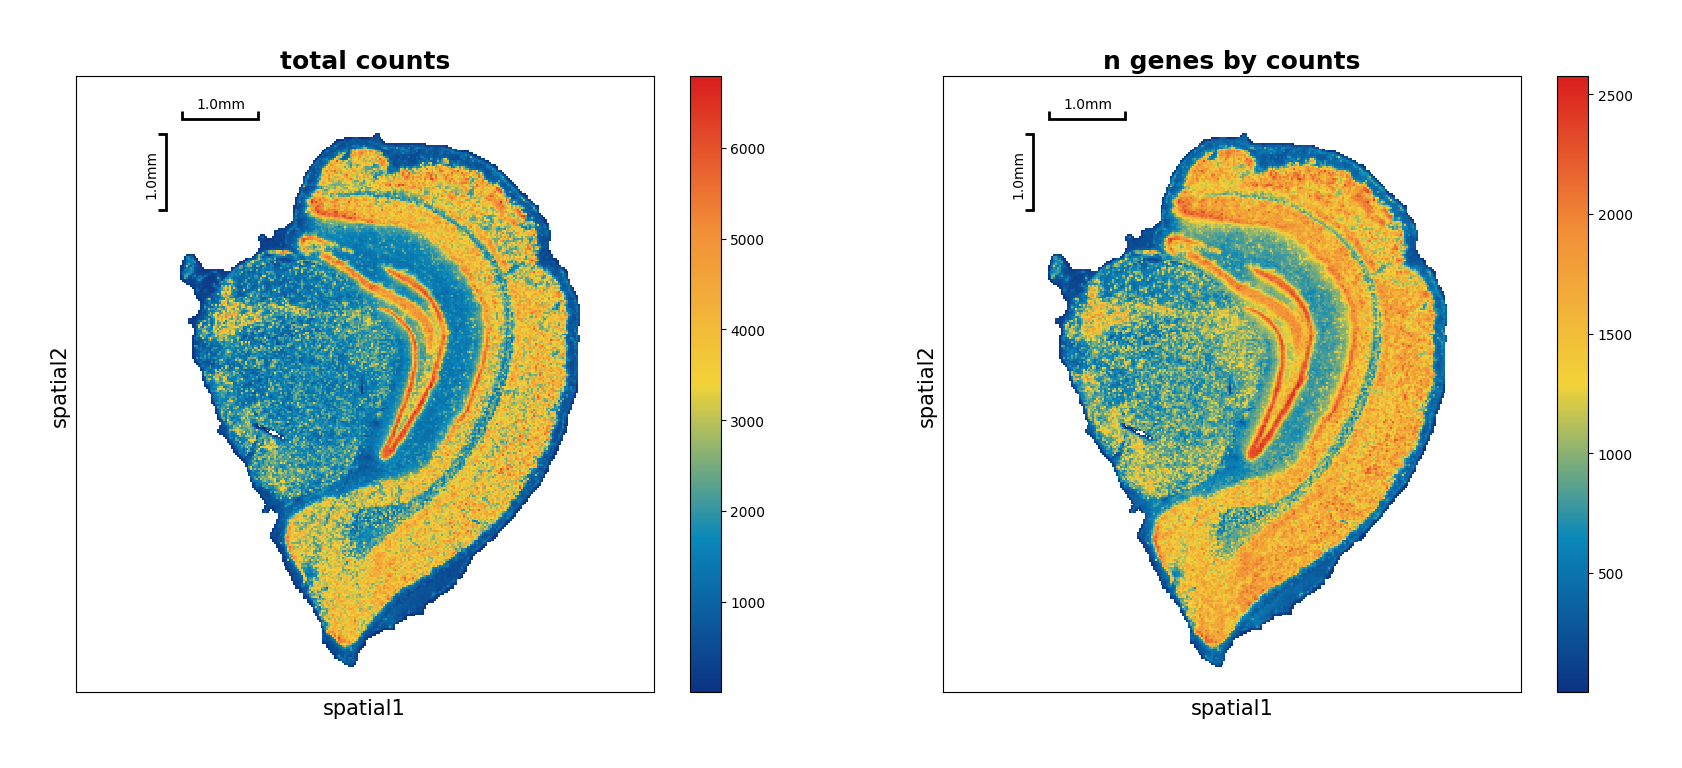

In [7]:
data.plt.spatial_scatter()

#### Filtering 

Three basic methods are provided to filter data maxtrix:

`data.tl.filter_cells`,
`data.tl.filter_genes`,
`data.tl.filter_coordinates`.

Literally, you could filter data on three optional levels: cell, gene and coordinate where a `bin unit` could be treated as a made-up cell provisionally.

We filter `bin units` (**bin_size** is set to 50 at the beginning of our example) based on quality control indicators which have been calculated in QC part. Beforehand, observe the distribution of cells according to scatter plots.

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

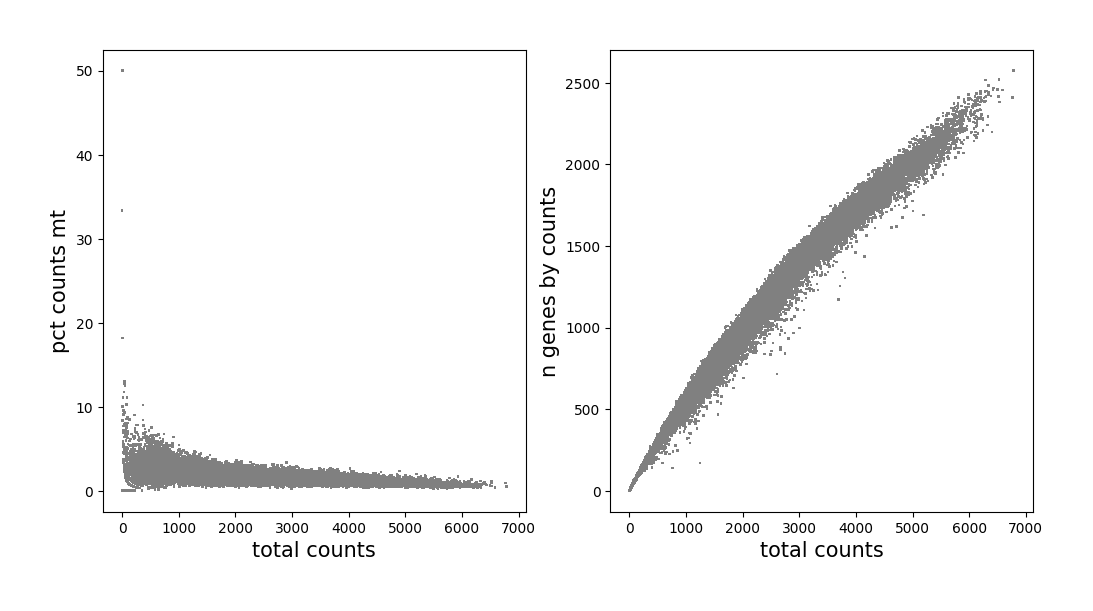

In [8]:
data.plt.genes_count()

Remove cells that have too many mitochondrial genes expressed, as well as cells without enough counts and genes expressed.

In [9]:
data.tl.filter_cells(
        min_counts=20, 
        min_genes=3, 
        pct_counts_mt=5, 
        inplace=True
        )
data

[2024-01-17 10:20:05][Stereo][3643][MainThread][140100178437952][st_pipeline][41][INFO]: start to run filter_cells...
[2024-01-17 10:20:06][Stereo][3643][MainThread][140100178437952][st_pipeline][44][INFO]: filter_cells end, consume time 0.4412s.


StereoExpData object with n_cells X n_genes = 35738 X 24302
bin_type: bins
bin_size: 50
offset_x = 0
offset_y = 0
cells: ['cell_name', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt']
genes: ['gene_name', 'n_cells', 'n_counts', 'mean_umi']
result: []

<div class="alert alert-info">

**Note**

We strongly suggest to use `self.raw` to record the raw gene expression matrix which has been gone through basic processing, as an essential data set for subsequent differential testing and multiple analysis.

</div>

So in order to save the data and recall it conveniently, you can save the raw expression matrix by `data.tl.raw_checkpoint()`. 

In [10]:
data.tl.raw_checkpoint()

In [11]:
data.tl.raw

StereoExpData object with n_cells X n_genes = 35738 X 24302
bin_type: bins
bin_size: 50
offset_x = 0
offset_y = 0
cells: ['cell_name', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt']
genes: ['gene_name', 'n_cells', 'n_counts', 'mean_umi']
result: []

<div class="alert alert-info">

**Note**

When you want to get raw data, just run `data.tl.reset_raw_data()`.

</div>

#### Normalization

In this module, you can choose from following common methods of standardization:

- [normalize_total](https://www.nature.com/articles/nbt.3192)
- [log1p](https://academic.oup.com/bioinformatics/article/37/15/2223/6155989)
- scale
- [scTransform](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-019-1874-1)
- [quantile](https://github.com/panjie-payne/test-sphinx/blob/master/docs/source/_static/quantile.pdf)
    

<div class="alert alert-info">

**Note**

If the parameter `inplace` is set to `True` by default, expression matrix data will be replaced by the corresponding result (here replaced by the normalized result), otherwise unchanged.

</div>

Run a combination method of `normalize_total` and `log1p` to normalize gene expression matrix as below:

In [12]:
# inplace is set to True by default

data.tl.normalize_total(target_sum=10000)
data.tl.log1p()

[2024-01-17 10:20:06][Stereo][3643][MainThread][140100178437952][st_pipeline][41][INFO]: start to run normalize_total...
[2024-01-17 10:20:06][Stereo][3643][MainThread][140100178437952][st_pipeline][44][INFO]: normalize_total end, consume time 0.3486s.
[2024-01-17 10:20:06][Stereo][3643][MainThread][140100178437952][st_pipeline][41][INFO]: start to run log1p...
[2024-01-17 10:20:06][Stereo][3643][MainThread][140100178437952][st_pipeline][44][INFO]: log1p end, consume time 0.0977s.


If you use `data.tl.sctransform` which includes the function of finding highly variable genes, you do not need to run `data.tl.highly_variable_genes`. In the subsequent `data.tl.pca` method, the parameter `use_highly_genes` has to be set as `False`. In brief, whether to use highly variable genes to run PCA depends on `filter_hvgs` in the normalization of scTransform. Learn more about [scTransform](https://github.com/STOmics/stereopy/blob/main/docs/source/Tutorials/sctransform.ipynb).

#### Highly variable genes

Identify highly variable genes in cells.

In [13]:
data.tl.highly_variable_genes(
        min_mean=0.0125,
        max_mean=3,
        min_disp=0.5,
        n_top_genes=2000, 
        res_key='highly_variable_genes'
        ) 

[2024-01-17 10:20:06][Stereo][3643][MainThread][140100178437952][st_pipeline][41][INFO]: start to run highly_variable_genes...
[2024-01-17 10:20:07][Stereo][3643][MainThread][140100178437952][st_pipeline][44][INFO]: highly_variable_genes end, consume time 0.7429s.


If `data.tl.scale(zero_center=False)` is used, sparse matrix will be used for calculation, which can greatly reduce the memory required for running.

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

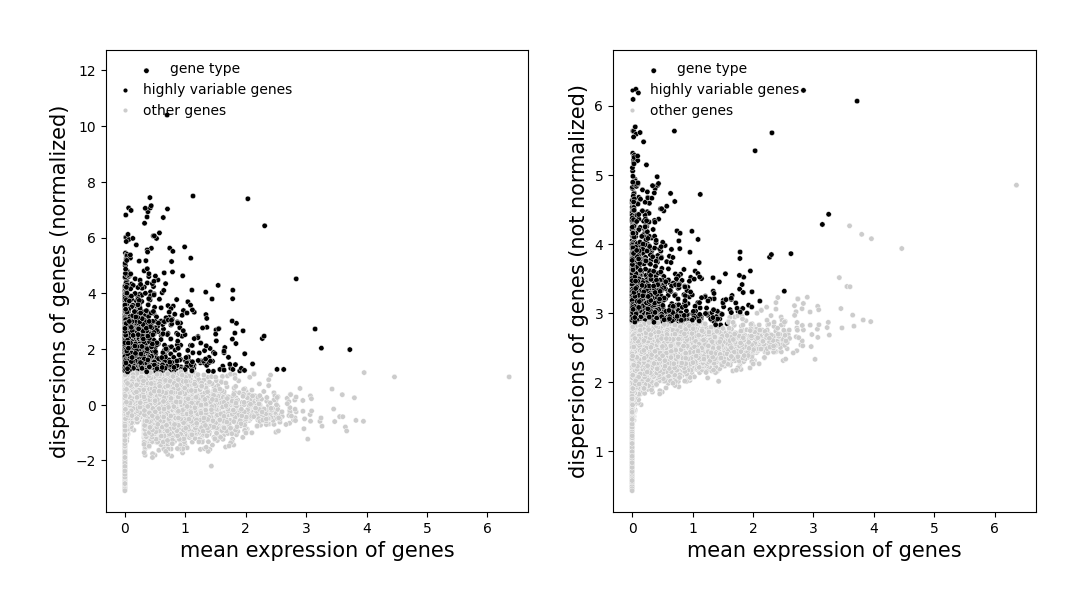

In [14]:
# remember to choose a res_key when plot

data.plt.highly_variable_genes(res_key='highly_variable_genes')

Scale each gene to unit variance. Clip values exceeding standard deviation 10. If `data.tl.scale(zero_center=False)` is used, sparse matrix will be used for calculation, which can greatly reduce the memory required for running.

In [15]:
data.tl.scale(max_value=10, zero_center=True)

[2024-01-17 10:20:09][Stereo][3643][MainThread][140100178437952][st_pipeline][41][INFO]: start to run scale...
[2024-01-17 10:20:17][Stereo][3643][MainThread][140100178437952][scale][53][INFO]: Truncate at max_value 10
[2024-01-17 10:20:17][Stereo][3643][MainThread][140100178437952][st_pipeline][44][INFO]: scale end, consume time 8.3585s.


## Embedding

#### PCA (Principal component analysis)

As a statistical technique for reducing dimensionality of a data set, PCA finds the max axes of greatest variation, which preserve as much information as possible. Notice that if set parameter `use_highly_genes` to `True`, only highly variable genes are used to run.

In [16]:
data.tl.pca(
        use_highly_genes=False, 
        n_pcs=30, 
        res_key='pca'
        )

[2024-01-17 10:20:17][Stereo][3643][MainThread][140100178437952][st_pipeline][41][INFO]: start to run pca...
[2024-01-17 10:20:32][Stereo][3643][MainThread][140100178437952][st_pipeline][44][INFO]: pca end, consume time 14.8000s.


When the parameter `res_key` arises, the corresponding result will be **stored automatically**, simply check:

In [17]:
data.tl.key_record

{'hvg': ['highly_variable_genes'],
 'pca': ['pca'],
 'neighbors': [],
 'umap': [],
 'cluster': [],
 'marker_genes': []}

We can plot the elbow to help us to determine how to choose PCs to be used.

[2024-01-17 10:20:32][Stereo][3643][MainThread][140100178437952][plot_collection][84][INFO]: register plot_func elbow to <stereo.plots.plot_collection.PlotCollection object at 0x7f6b322ce700>


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

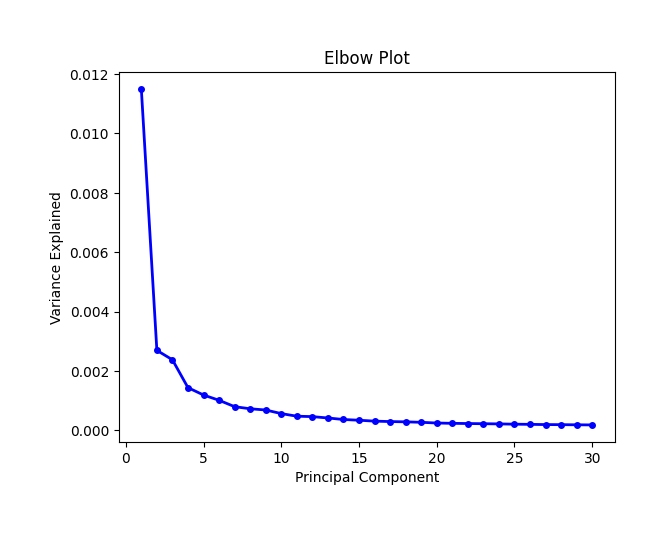

In [18]:
data.plt.elbow(pca_res_key='pca')

#### Neighborhood graph 

After PCA, we compute the neighborhood graph of cells using the PCA representation of the expression matrix.

In [19]:
data.tl.neighbors(
        pca_res_key='pca', 
        n_pcs=30, 
        res_key='neighbors'
        )

# compute spatial neighbors 
data.tl.spatial_neighbors(
        neighbors_res_key='neighbors',
        res_key='spatial_neighbors'
        )

[2024-01-17 10:20:33][Stereo][3643][MainThread][140100178437952][st_pipeline][41][INFO]: start to run neighbors...
[2024-01-17 10:20:53][Stereo][3643][MainThread][140100178437952][st_pipeline][44][INFO]: neighbors end, consume time 20.3813s.
[2024-01-17 10:20:53][Stereo][3643][MainThread][140100178437952][st_pipeline][41][INFO]: start to run spatial_neighbors...
[2024-01-17 10:20:57][Stereo][3643][MainThread][140100178437952][reader][821][INFO]: Adding sample in adata.obs['orig.ident'].
[2024-01-17 10:20:57][Stereo][3643][MainThread][140100178437952][reader][824][INFO]: Adding data.position as adata.obsm['spatial'] .
[2024-01-17 10:20:57][Stereo][3643][MainThread][140100178437952][reader][829][INFO]: Adding data.position as adata.obs['x'] and adata.obs['y'] .
[2024-01-17 10:20:58][Stereo][3643][MainThread][140100178437952][reader][859][INFO]: Adding data.tl.result['highly_variable_genes'] into adata.var .
[2024-01-17 10:20:58][Stereo][3643][MainThread][140100178437952][reader][881][INF

In addition, we also provide `data.tl.spatial_neighbors` to compute a spatial neighbors graph.

#### UMAP

It's strongly to suggest embedding the graph in two dimensions using UMAP.

In [20]:
data.tl.umap(pca_res_key='pca', neighbors_res_key='neighbors', res_key='umap')

[2024-01-17 10:21:01][Stereo][3643][MainThread][140100178437952][st_pipeline][41][INFO]: start to run umap...


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs


[2024-01-17 10:21:28][Stereo][3643][MainThread][140100178437952][st_pipeline][44][INFO]: umap end, consume time 27.1704s.


Plot the umap result of two genes: **Atpif1** and **Tmsb4x**. 

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

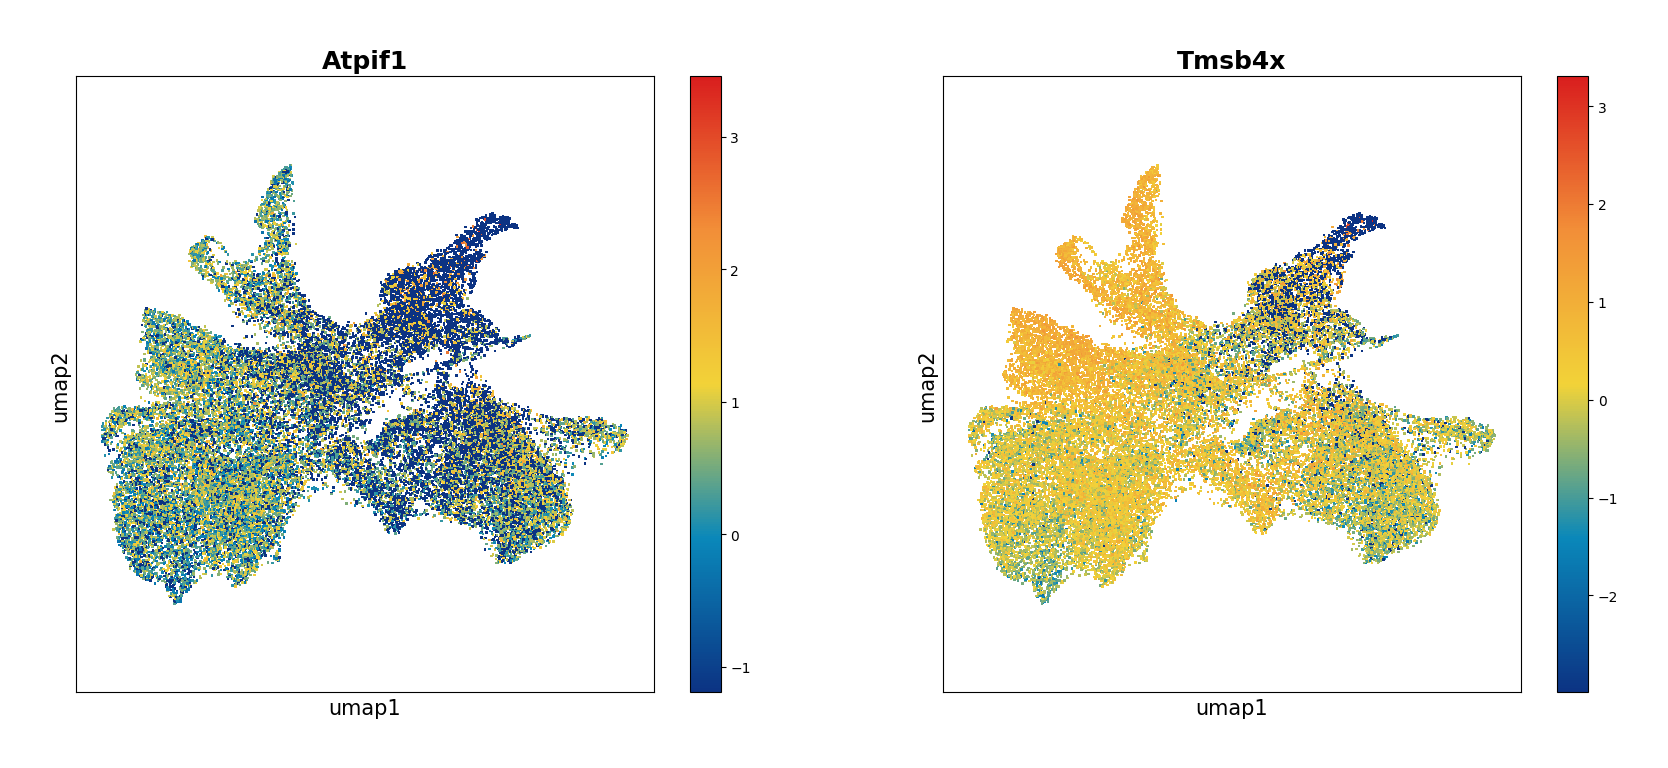

In [21]:
data.plt.umap(gene_names=['Atpif1', 'Tmsb4x'], res_key='umap')

## Clustering

Currently we provide three common clustering methods, including **Leiden**, **Louvain** and **Phenograph**.

In this tool, you can re-run the normalization method before clustering if the parameter `normalize_method`  is not None. Then by default, we perform PCA to reduce the dimensionalites of the new normalization result, and use top 30 pcs to run clustering. 

At this stage, we strongly recommend using leiden. 

#### Leiden 

Simply run:

In [22]:
data.tl.leiden(neighbors_res_key='neighbors', res_key='leiden')

[2024-01-17 10:22:04][Stereo][3643][MainThread][140100178437952][st_pipeline][41][INFO]: start to run leiden...
[2024-01-17 10:22:27][Stereo][3643][MainThread][140100178437952][st_pipeline][44][INFO]: leiden end, consume time 22.6067s.


Show the spatial distribution of the Leiden clustering.

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

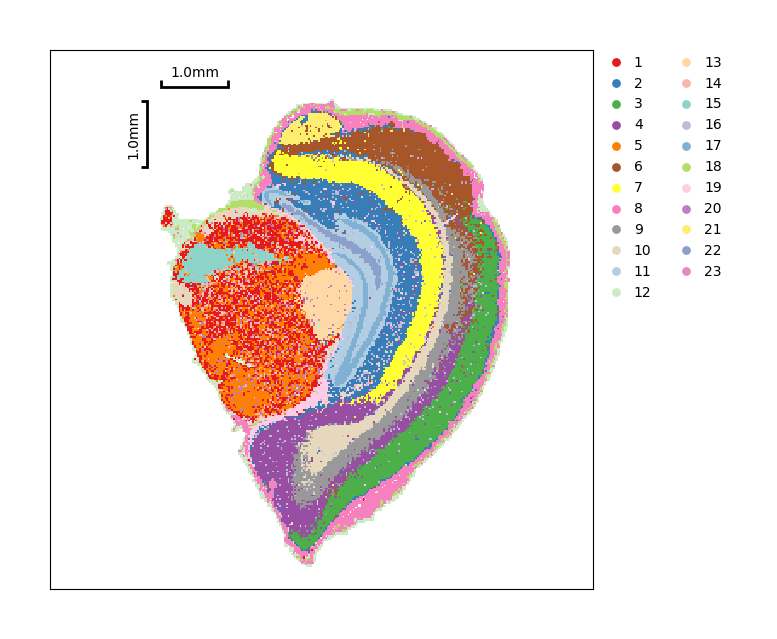

In [23]:
data.plt.cluster_scatter(res_key='leiden')

You also can just show partial clustering result.

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

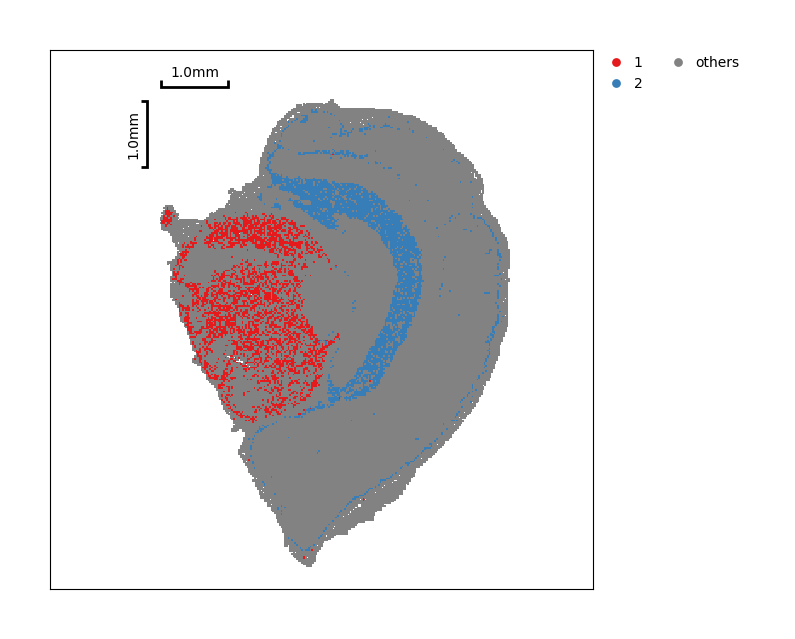

In [24]:
data.plt.cluster_scatter(res_key='leiden', groups=['1', '2'])

Show the distribution of the UMAP embedding.

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

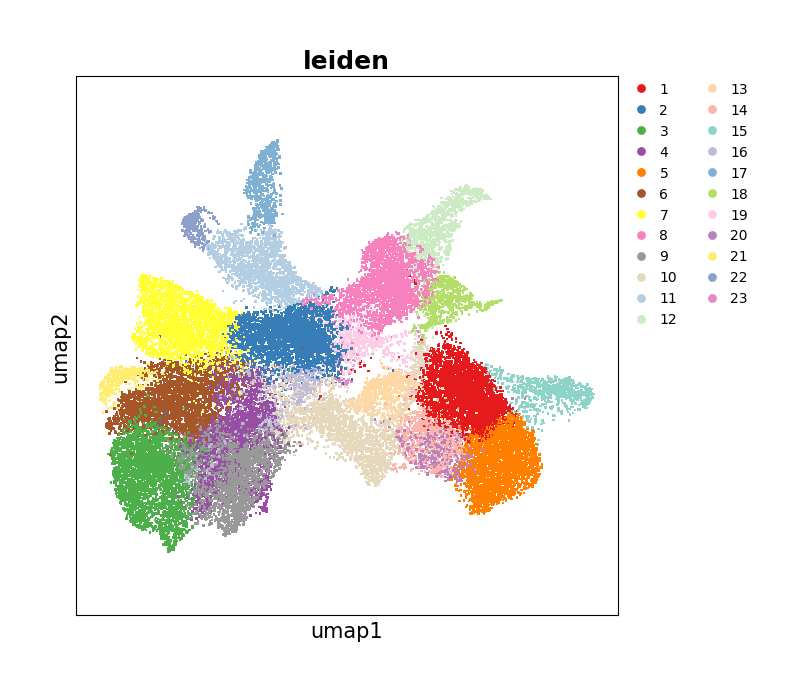

In [25]:
data.plt.umap(res_key='umap', cluster_key='leiden')

`data.plt.interact_cluster` generates an interact module from **Jupyter Notebook** and basic interactive manipulations could be done here. Simple clicks help you finish a series of operations, inclusing moving, tailoring, dyeing, saving and etc., over different clustering groups. More about in Interactive cluster.

In [26]:
data.plt.interact_cluster(res_key='leiden')

Row
    [0] ParamFunction(function, _pane=HoloViews)
    [1] Column
        [0] ColorPicker(name='background color', value='#ffffff', width=200)
        [1] IntSlider(end=200, name='dot size', start=1, value=1, width=200)
        [2] Select(name='color theme', options=['diverging_isoluminant_cj...], value='stereo_30', width=200)
        [3] Row
            [0] Select(name='cluster', options=['1', '2', '3', ...], value='1', width=100)
            [1] ColorPicker(name='node color', value='#E41A1C', width=70)

The same way to display results of distribution, using spatial neighbors:

In [27]:
data.tl.leiden(neighbors_res_key='spatial_neighbors', res_key='spatial_leiden')

[2024-01-17 10:22:31][Stereo][3643][MainThread][140100178437952][st_pipeline][41][INFO]: start to run leiden...
[2024-01-17 10:22:57][Stereo][3643][MainThread][140100178437952][st_pipeline][44][INFO]: leiden end, consume time 26.4340s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

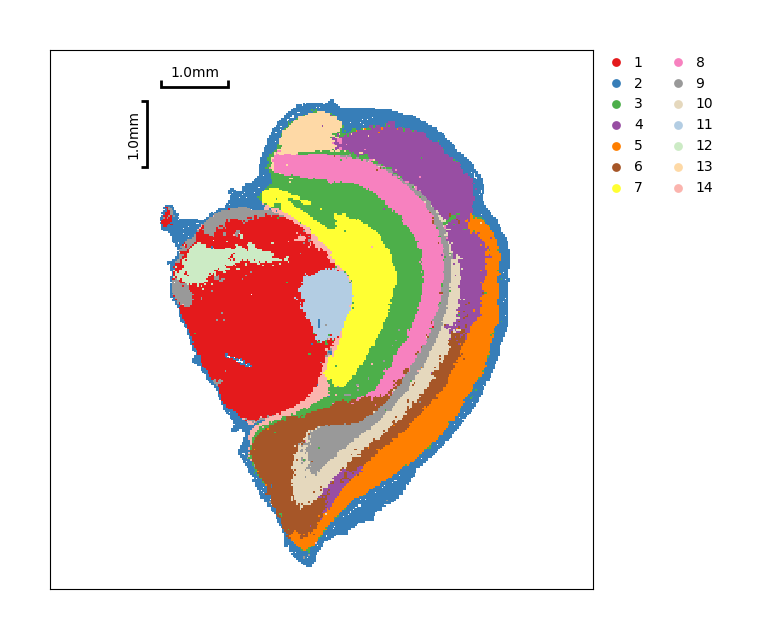

In [28]:
data.plt.cluster_scatter(res_key='spatial_leiden')

#### Louvain

When clustering by Louvain algorithm, just run:

In [29]:
data.tl.louvain(neighbors_res_key='neighbors', res_key='louvain')

[2024-01-17 10:22:58][Stereo][3643][MainThread][140100178437952][st_pipeline][41][INFO]: start to run louvain...
[2024-01-17 10:22:58][Stereo][3643][MainThread][140100178437952][_louvain][109][INFO]:     using the "louvain" package of Traag (2017)
[2024-01-17 10:23:02][Stereo][3643][MainThread][140100178437952][st_pipeline][44][INFO]: louvain end, consume time 3.8535s.


Show the spatial distribution of Louvain clustering.

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

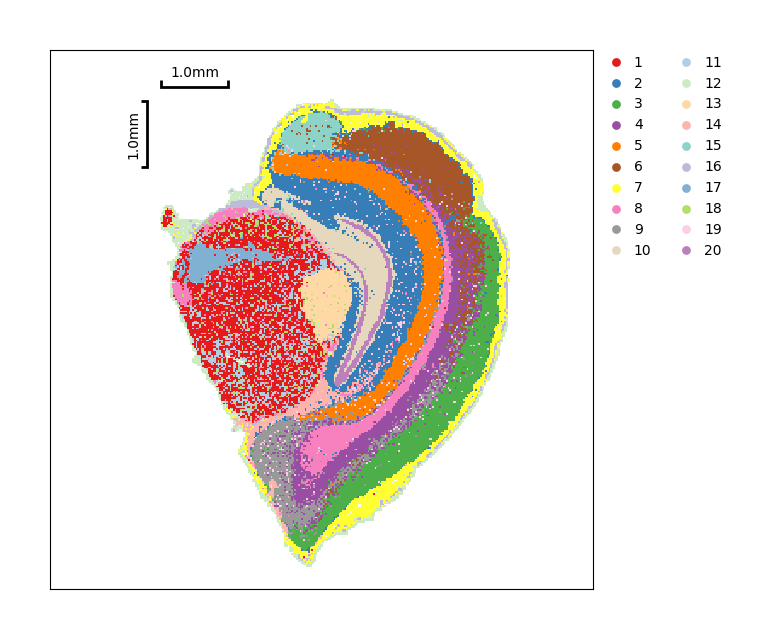

In [30]:
data.plt.cluster_scatter(res_key='louvain')

#### Phenograph

When clustering by Phenograph algorithm, just run:

In [31]:
data.tl.phenograph(phenograph_k=30, pca_res_key='pca', res_key='phenograph')

[2024-01-17 10:23:03][Stereo][3643][MainThread][140100178437952][st_pipeline][41][INFO]: start to run phenograph...


Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 1.8044803142547607 seconds
Jaccard graph constructed in 21.25911808013916 seconds
Running Leiden optimization
Leiden completed in 19.410745859146118 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 56.2121479511261 seconds


[2024-01-17 10:24:00][Stereo][3643][MainThread][140100178437952][st_pipeline][44][INFO]: phenograph end, consume time 57.1281s.


Show the spatial distribution of Phenograph clustering.

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

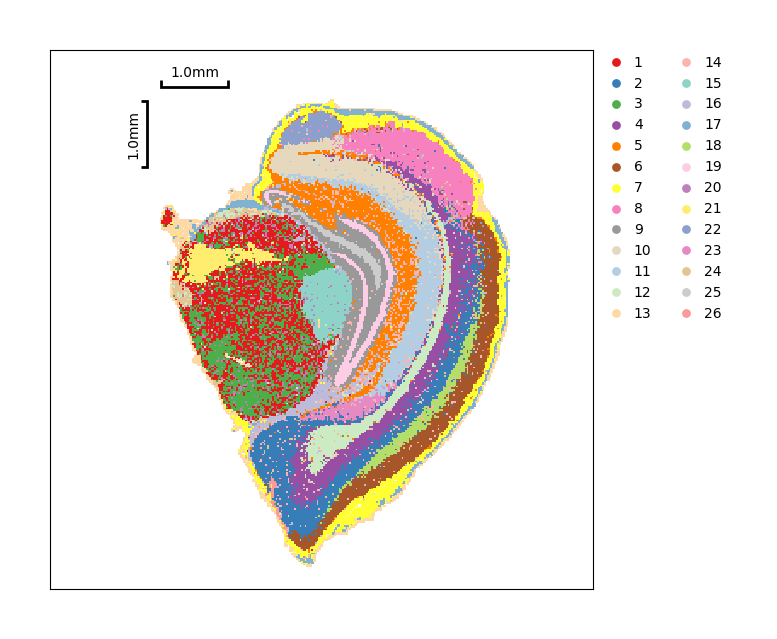

In [32]:
data.plt.cluster_scatter(res_key='phenograph')

##  Find Marker Genes

Hypothesis test is used to compute a ranking of differentially expressed genes among clusters. The raw count of express matrix which has been saved in `self.raw` by `data.tl.raw_checkpoint()` and highly variable genes are two optional data sets, used to find marker genes.

Here supports two methods, `t_test` and `wilcoxon_test`, to find marker genes between pairs among all clusters. T-test is a common and simple approach to do so.

In [33]:
data.tl.find_marker_genes(
        cluster_res_key='leiden', 
        method='t_test', 
        use_highly_genes=False, 
        use_raw=True
        )

[2024-01-17 10:24:01][Stereo][3643][MainThread][140100178437952][st_pipeline][41][INFO]: start to run find_marker_genes...
[2024-01-17 10:24:01][Stereo][3643][MainThread][140100178437952][tool_base][122][INFO]: read group information, grouping by group column.
[2024-01-17 10:24:01][Stereo][3643][MainThread][140100178437952][tool_base][151][INFO]: start to run...
[2024-01-17 10:24:01][Stereo][3643][MainThread][140100178437952][time_consume][57][INFO]: start to run calc_pct_and_pct_rest...
[2024-01-17 10:24:03][Stereo][3643][MainThread][140100178437952][time_consume][60][INFO]: calc_pct_and_pct_rest end, consume time 1.8275s.
[2024-01-17 10:24:09][Stereo][3643][MainThread][140100178437952][tool_base][153][INFO]: end to run.
[2024-01-17 10:24:09][Stereo][3643][MainThread][140100178437952][st_pipeline][44][INFO]: find_marker_genes end, consume time 7.7700s.


Display the ranking and scores of top 10 marker genes in each group.

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

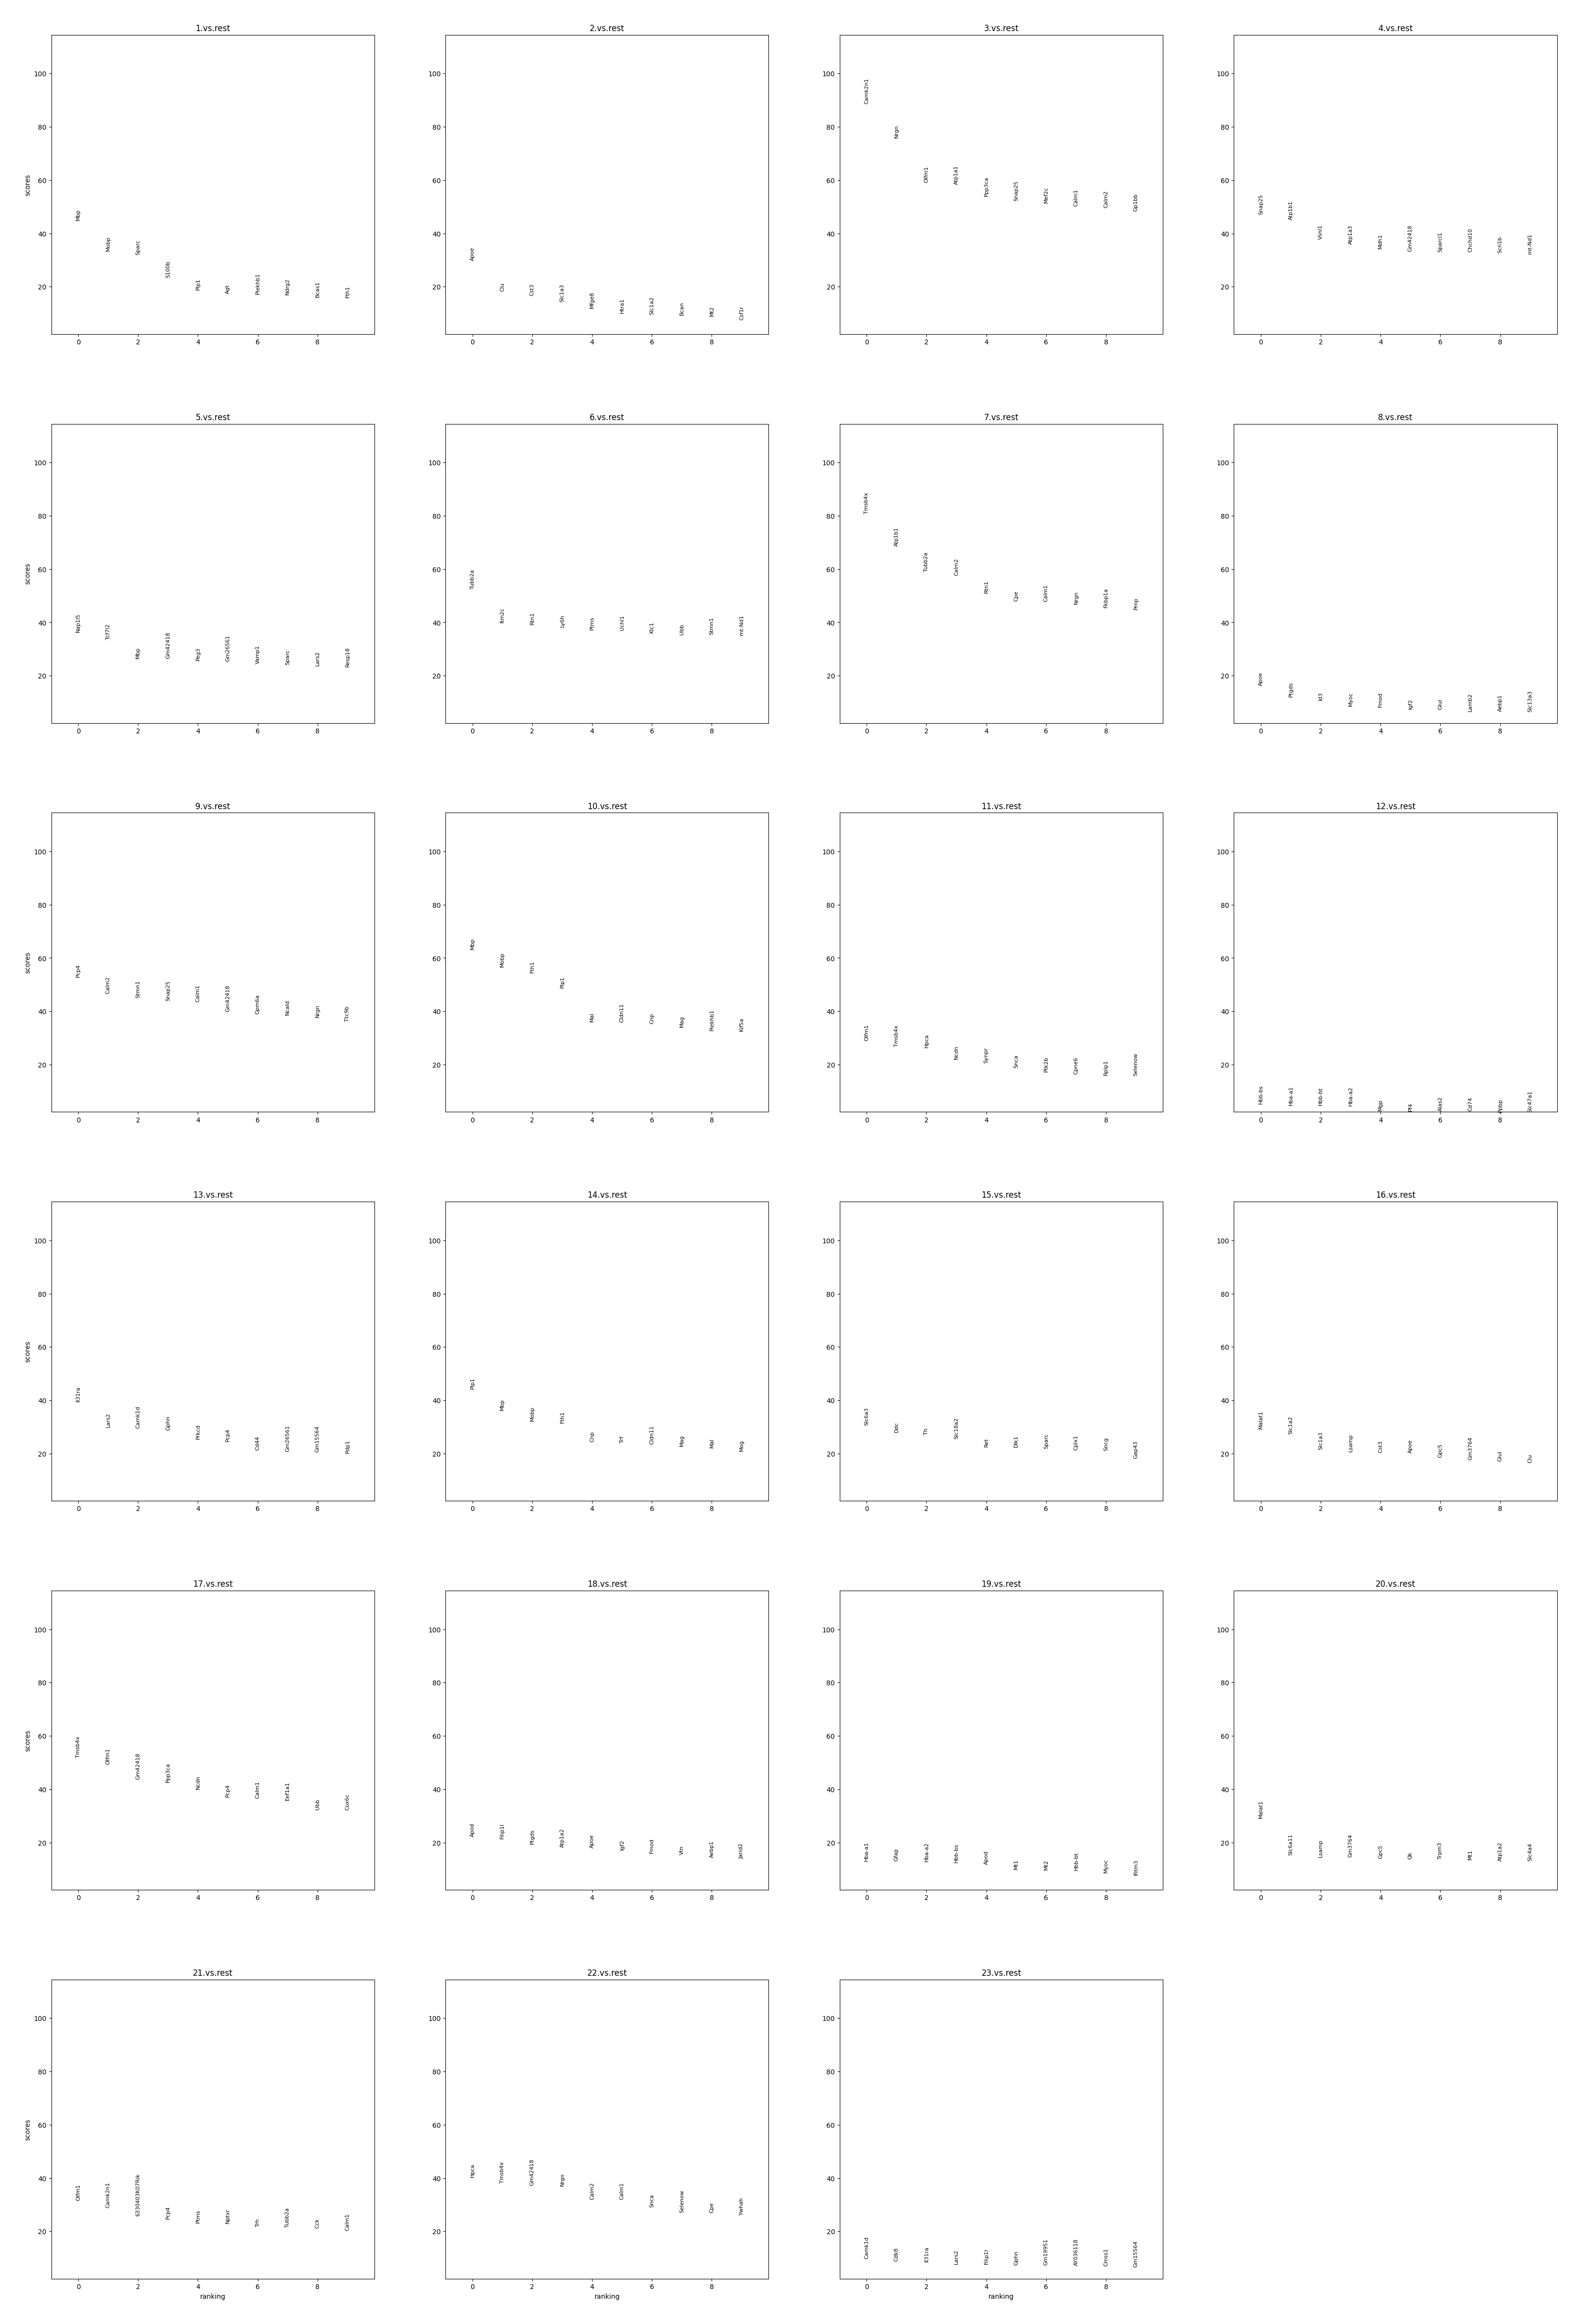

In [34]:
data.plt.marker_genes_text(
        res_key='marker_genes', 
        markers_num=10, 
        sort_key='scores'
        )

Display the scatter plot of top 5 marker genes in each group.

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

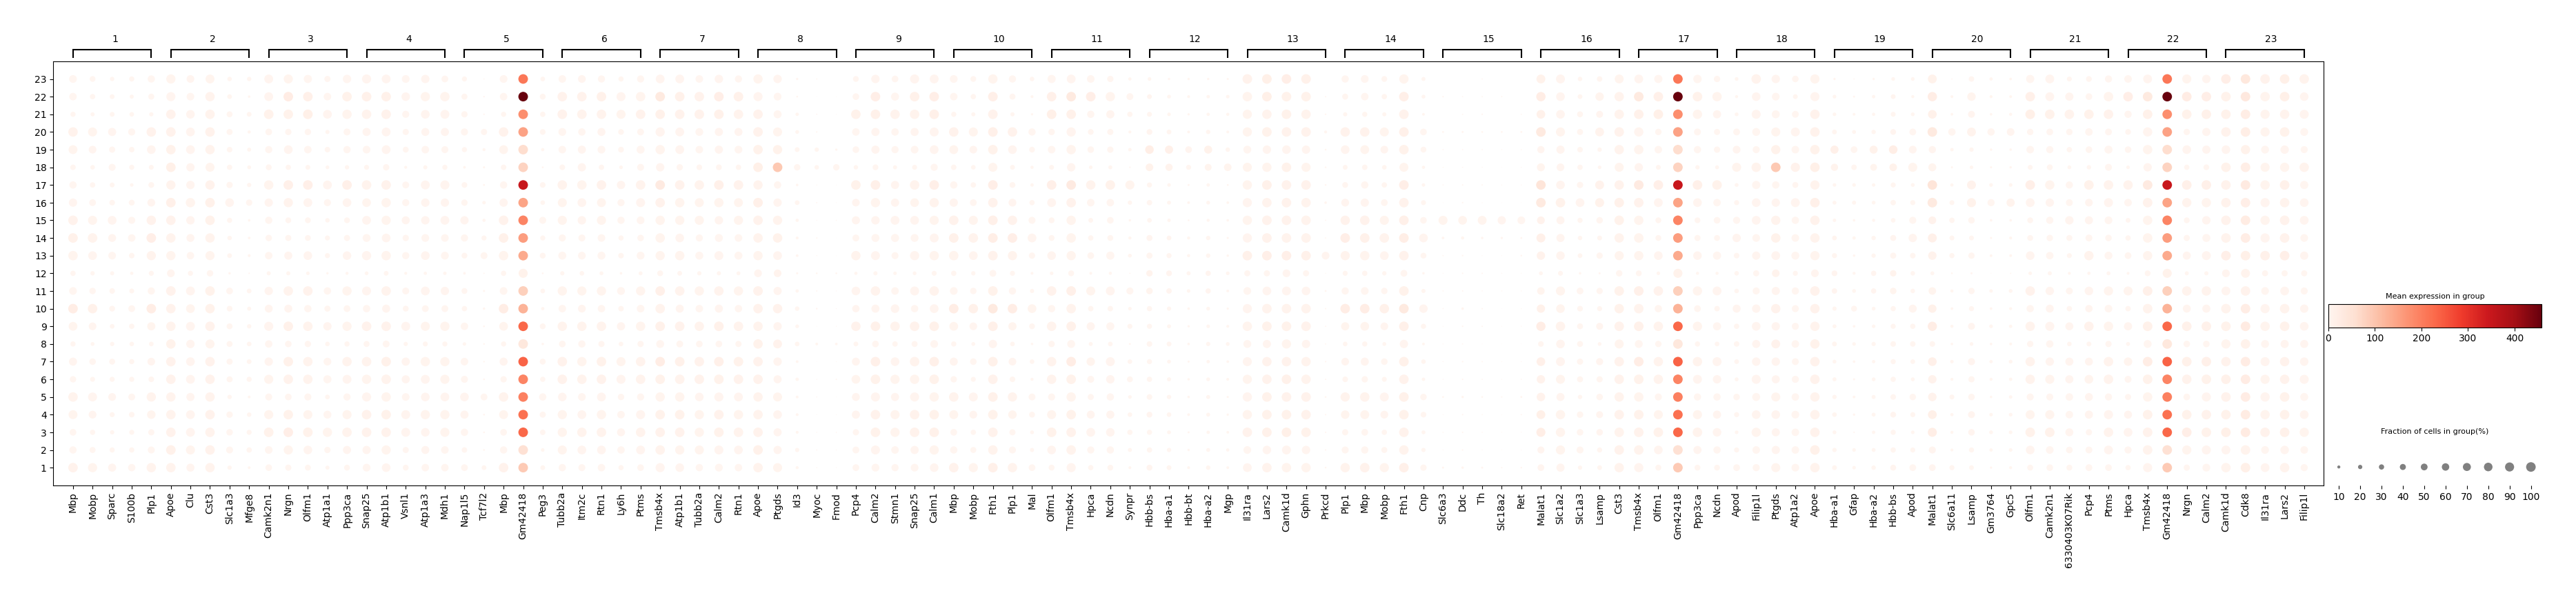

In [35]:
data.plt.marker_genes_scatter(res_key='marker_genes', markers_num=5)

Meanwhile, display the volcano plot of a specific group versus to the rest.

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

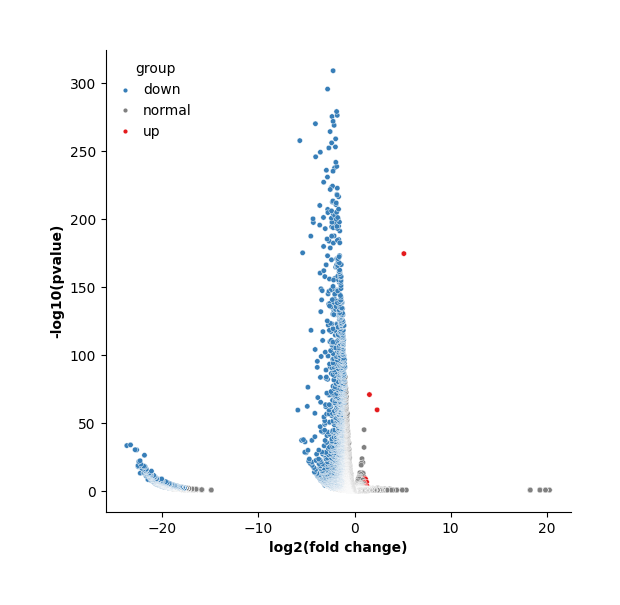

In [36]:
data.plt.marker_gene_volcano(group_name='2.vs.rest', vlines=False)

You can also filter out genes based on log fold change and fraction of genes expressing the gene within and outside each group.

In [37]:
data.tl.filter_marker_genes(
    marker_genes_res_key='marker_genes',
    min_fold_change=1,
    min_in_group_fraction=0.25,
    max_out_group_fraction=0.5,
    res_key='marker_genes_filtered'
)

[2024-01-17 10:24:35][Stereo][3643][MainThread][140100178437952][st_pipeline][41][INFO]: start to run filter_marker_genes...
[2024-01-17 10:24:36][Stereo][3643][MainThread][140100178437952][st_pipeline][44][INFO]: filter_marker_genes end, consume time 1.0848s.


## Annotation

After finding marker genes, we can annotate clustering results by using `data.tl.annotation` or `data.plt.interact_annotation_cluster`.

In [38]:
data.plt.interact_annotation_cluster(
            res_cluster_key='leiden', 
            res_marker_gene_key='marker_genes', 
            res_key='leiden_annotation'
            )

Row
    [0] ParamFunction(function, _pane=HoloViews)
    [1] Column
        [0] IntSlider(end=200, name='dot size', start=1, value=1, width=200)
        [1] Row
            [0] Select(name='cluster', options=['1', '2', '3', ...], value='1', width=100)
            [1] TextInput(name='annotation', width=100)
        [2] Button(name='Save annotation', width=200)
        [3] ParamFunction(function, _pane=DataFrame)

Use command lines to annotate clusters:

In [39]:
annotation_dict = {
    '1':'a', '2':'b',
    '3':'c', '4':'d',
    '5':'e', '6':'f',
    '7':'g', '8':'h',
    '9':'i', '10':'j',
    '11':'k', '12': 'l',
    '13': 'm', '14': 'n',
    '15': 'o', '16': 'p',
    '17': 'q', '18': 'r',
    '19': 's', '20': 't',
    '21': 'u', '22': 'v',
    '23': 'w', '24': 'x',
    '25': 'y', '26': 'z'
    }
data.tl.annotation(
        annotation_information=annotation_dict, 
        cluster_res_key='leiden', 
        res_key='anno_leiden'
        )

[2024-01-17 10:24:38][Stereo][3643][MainThread][140100178437952][st_pipeline][41][INFO]: start to run annotation...
[2024-01-17 10:24:38][Stereo][3643][MainThread][140100178437952][st_pipeline][44][INFO]: annotation end, consume time 0.8266s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

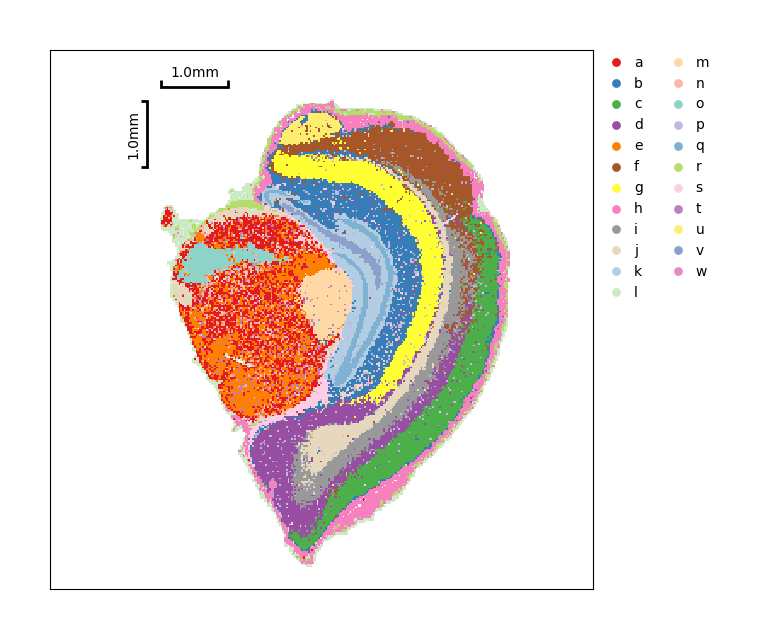

In [40]:
data.plt.cluster_scatter(res_key='anno_leiden')

At the end, you could transform our data object to AnnData and save analysis results into an H5ad file.

In [47]:
adata = st.io.stereo_to_anndata(data, output='SS200000135TL_D1_seurat.h5ad')

[2024-01-17 10:29:45][Stereo][3643][MainThread][140100178437952][reader][821][INFO]: Adding sample in adata.obs['orig.ident'].
[2024-01-17 10:29:45][Stereo][3643][MainThread][140100178437952][reader][824][INFO]: Adding data.position as adata.obsm['spatial'] .
[2024-01-17 10:29:45][Stereo][3643][MainThread][140100178437952][reader][829][INFO]: Adding data.position as adata.obs['x'] and adata.obs['y'] .
[2024-01-17 10:29:45][Stereo][3643][MainThread][140100178437952][reader][859][INFO]: Adding data.tl.result['highly_variable_genes'] into adata.var .
[2024-01-17 10:29:45][Stereo][3643][MainThread][140100178437952][reader][881][INFO]: Adding data.tl.result['pca'] into adata.obsm['X_pca'] .
[2024-01-17 10:29:45][Stereo][3643][MainThread][140100178437952][reader][889][INFO]: Adding data.tl.result['neighbors']['connectivities'] into adata.obsp['connectivities'] .
[2024-01-17 10:29:45][Stereo][3643][MainThread][140100178437952][reader][890][INFO]: Adding data.tl.result['neighbors']['nn_dist'] 

In [48]:
adata

AnnData object with n_obs × n_vars = 35738 × 24302
    obs: 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'leiden', 'spatial_leiden', 'louvain', 'phenograph', 'anno_leiden', 'orig.ident', 'x', 'y'
    var: 'n_cells', 'n_counts', 'mean_umi', 'hvgs', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'gene type'
    uns: 'bin_type', 'bin_size', 'resolution', 'sn', 'hvg', 'neighbors', 'spatial_neighbors', 'gene_exp_leiden', 'gene_exp_spatial_leiden', 'gene_exp_louvain', 'gene_exp_phenograph', 'gene_exp_anno_leiden'
    obsm: 'spatial', 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances', 'spatial_neighbors_connectivities', 'spatial_neighbors_distances'